# Recreating a roughness characteristic curve for a high planarity surface in a cave

In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:
with open("../../sample_data/RoughnessCharacteristics/HighPlanarity_RoughnessTest.pts", "r") as f:
    header = f.readline()
    f.close()

In [14]:
parsed = [(c, float(elem.strip("Roughness_(").strip(")"))) for c,elem in enumerate(header.split(" ")) if "Roughness" in elem]

In [25]:
with open("../../sample_data/RoughnessCharacteristics/HighPlanarity_RoughnessTest_TLS.pts", "r") as f:
    header = f.readline()
    f.close()

In [26]:
header

'//X Y Z Intensity Return_Number Number_Of_Returns Planarity_(0.2) Roughness_(0.01) Roughness_(0.02) Roughness_(0.03) Roughness_(0.04) Roughness_(0.05) Roughness_(0.06) Roughness_(0.08) Roughness_(0.09) Roughness_(0.1) Roughness_(0.12) Roughness_(0.14) Roughness_(0.16) Roughness_(0.18) Roughness_(0.2) Roughness_(0.22) Roughness_(0.24) Roughness_(0.07) Planarity_(0.1) R G B\n'

In [27]:
parsed_TLS = [(c, float(elem.strip("Roughness_(").strip(")").strip("\n"))) for c,elem in enumerate(header.split(" ")) if "Roughness" in elem]

In [28]:
data = np.loadtxt("../../sample_data/RoughnessCharacteristics/HighPlanarity_RoughnessTest.pts", 
                  skiprows=1, usecols=[elem[0] for elem in parsed])
data_TLS = np.loadtxt("../../sample_data/RoughnessCharacteristics/HighPlanarity_RoughnessTest_TLS.pts", 
                      skiprows=1, usecols=[elem[0] for elem in parsed_TLS])

In [29]:
q68 = np.array([np.quantile(data[:, i][~np.isnan(data[:, i])], 0.68) for i in range(data.shape[1])])
q95 = np.array([np.quantile(data[:, i][~np.isnan(data[:, i])], 0.95) for i in range(data.shape[1])])


In [31]:
q68_TLS = np.array([np.quantile(data_TLS[:, i][~np.isnan(data_TLS[:, i])], 0.68) for i in range(data_TLS.shape[1])])
q95_TLS = np.array([np.quantile(data_TLS[:, i][~np.isnan(data_TLS[:, i])], 0.95) for i in range(data_TLS.shape[1])])

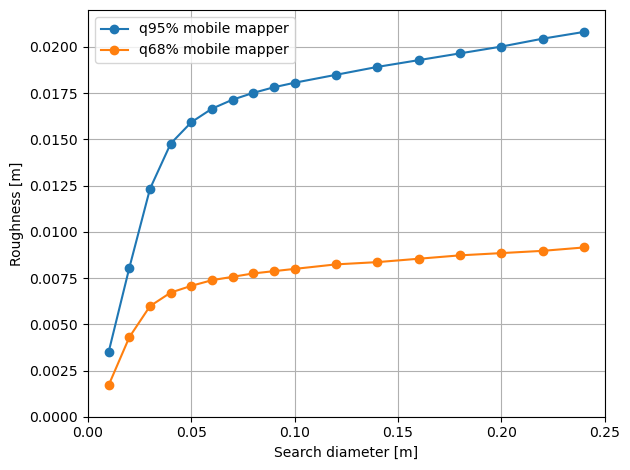

In [34]:
fig, ax = plt.subplots()
xi = np.array([elem[1] for elem in parsed])
idx = np.argsort(xi)

ax.plot(xi[idx], q95[idx], "-o", label = "q95% mobile mapper")
ax.plot(xi[idx], q68[idx], "-o", label = "q68% mobile mapper")


# xi = np.array([elem[1] for elem in parsed_TLS])
# idx = np.argsort(xi)

# ax.plot(xi[idx], q95_TLS[idx], "-o", label = "q95% mobile mapper")
# ax.plot(xi[idx], q68_TLS[idx], "-o", label = "q68% mobile mapper")
ax.grid()
ax.set_xlabel("Search diameter [m]")
ax.set_ylabel("Roughness [m]")
ax.set_xlim(0, 0.25)
ax.set_ylim(0, 0.022)
ax.legend()

plt.tight_layout()
plt.savefig("RoughnessDistributionCharacteristics.png", dpi = 300)
plt.show()